In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random
from collections import OrderedDict

In [2]:
def plot_degree_distribution(g):
    degree_dict = dict(g.degree())
    degree_ordered = OrderedDict(sorted(degree_dict.items(), key=lambda x: x[1], reverse=True))
    degree_sequence = list(degree_ordered.values())
    prob, bin_edges = np.histogram(degree_sequence, bins=range(1,np.max(degree_sequence)+2), density=True)
    plt.loglog(bin_edges[:-1], prob, '.', marker='x')
    plt.title('Probability density function')
    plt.xlabel('degree')
    plt.ylabel('probability')
    plt.show()
    return

In [3]:
def flip_coin(p):
    q = np.random.random()
    if(q < p):
        return True
    return False

In [4]:
def generate_random_graph(N,p):
    g = nx.Graph()
    #Create N nodes
    for i in range(0,N):
        g.add_node(i)
    #Set attributes
    for node in g.nodes:
        g.nodes[node]['susceptible'] = True
        g.nodes[node]['infected'] = False
    #Connect edges w/ Bernoulli trials
    for i in range(0,N):
        for j in range(i,N):
            if(flip_coin(p)):
                g.add_edge(i,j)
    return g

In [5]:
def get_random_node(g):
    return g.nodes[random.randrange(len(g.nodes))]

In [6]:
def initiate_infection(g):
    #get random node from graph
    patient_zero = get_random_node(g)
    #mark as infected and not susceptible
    patient_zero['susceptible'] = False
    patient_zero['infected'] = True
    return g

In [7]:
def iterate_infection(g, r0, rec_rate):
    #find all the infected nodes
    infected_nodes = list(filter(lambda x: g.nodes[x]['infected'] == True, g.nodes))
    #recover or infect neighbors
    for i_node in infected_nodes:
        if flip_coin(rec_rate):
            g.nodes[i_node]['infected'] = False
            g.nodes[i_node]['recovered'] = True
        else:
            s_neighbors = list(filter(lambda x: g.nodes[x]['susceptible'] == True, g.neighbors(i_node)))
            for s_node in s_neighbors:
                if flip_coin(r0):
                    g.nodes[s_node]['infected'] = True
                    g.nodes[s_node]['susceptible'] = False
    return g

In [8]:
def colorMap(graph):
    color_map = []
    for i_node in graph.nodes:
        if graph.nodes[i_node]['infected'] == True:
            color_map.append('red')
        else:
            if graph.nodes[i_node]['infected'] == False and graph.nodes[i_node]['susceptible'] == True:
                color_map.append('yellow')
            else:
                color_map.append('green')
    return color_map

In [9]:
def simulate_infection(N, p, r0, rec_rate, iterations):
    graph = generate_random_graph(N,p)
    graph = initiate_infection(graph)
    #visualize the initial graph
    init_color_map = colorMap(graph)
    plt.title('Iteration 0')
    nx.draw(graph, node_color=init_color_map, with_labels=True)
    plt.show()
    for x in range(0, iterations):
        graph = iterate_infection(graph, r0, rec_rate)
        #Red for infected,Yellow for susceptible, Green for recovered/uninfected.
        color_map = colorMap(graph)
        plt.title('Iteration ' + str(x+1))
        nx.draw(graph, node_color=color_map, with_labels=True)
        plt.show()
        plt.figure(figsize=(10,10))
        plt.axis('off')
        pos=nx.spring_layout(graph)        
    return

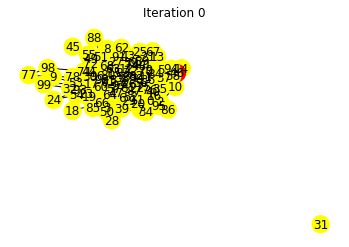

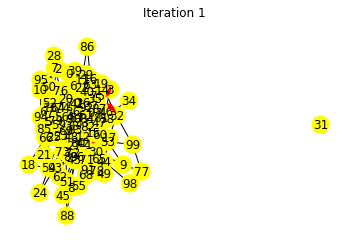

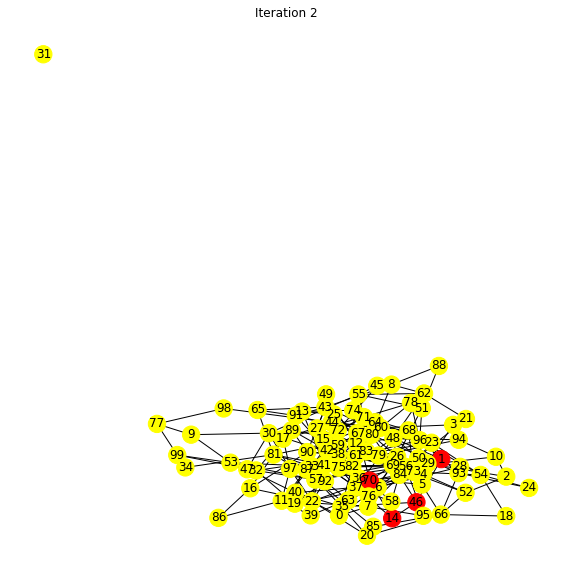

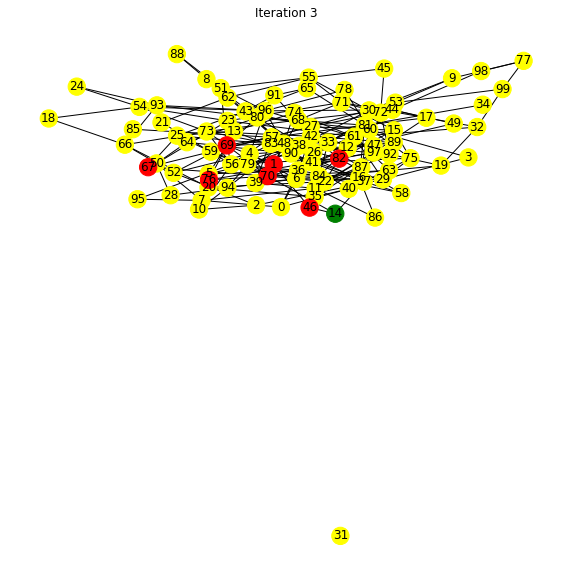

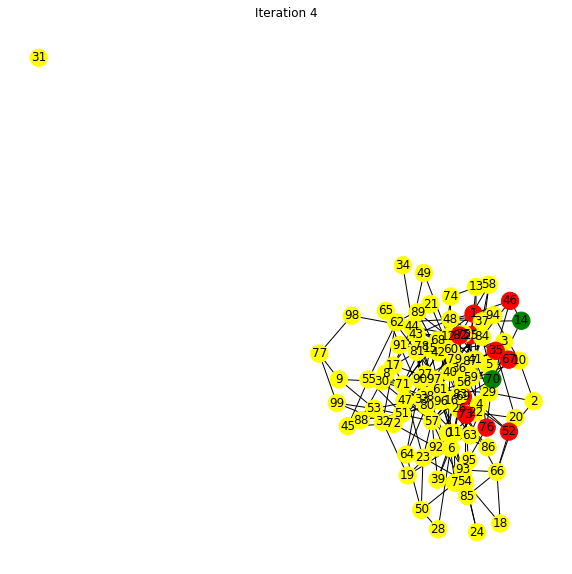

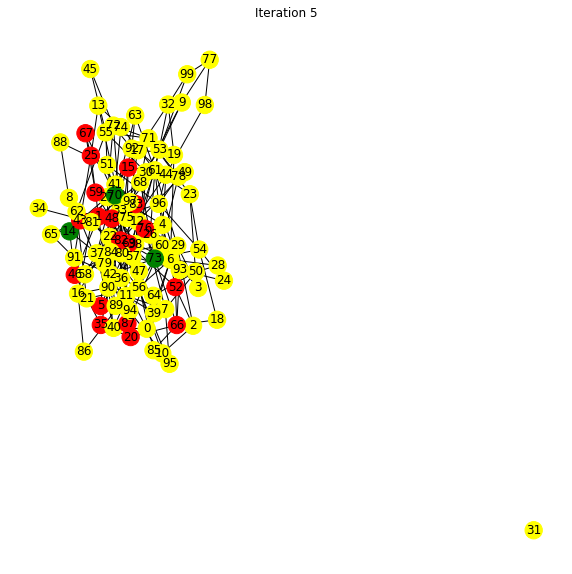

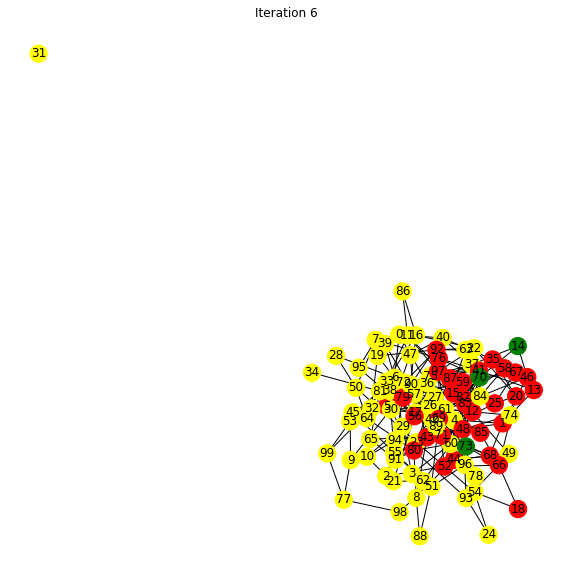

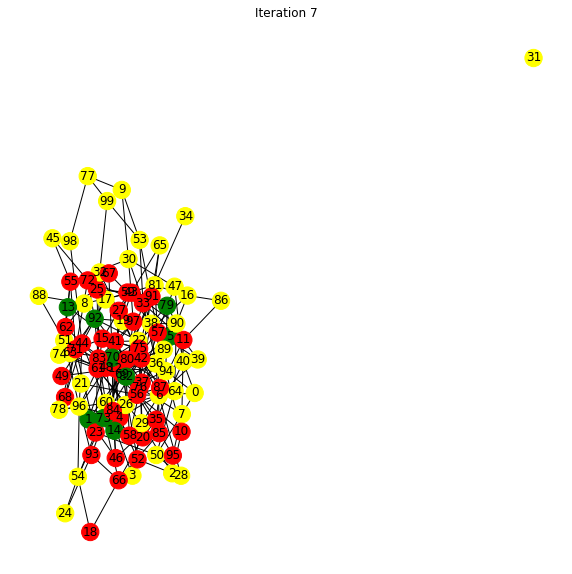

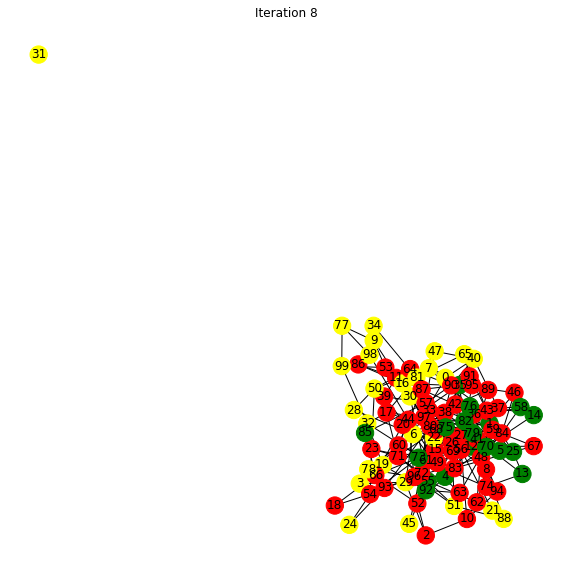

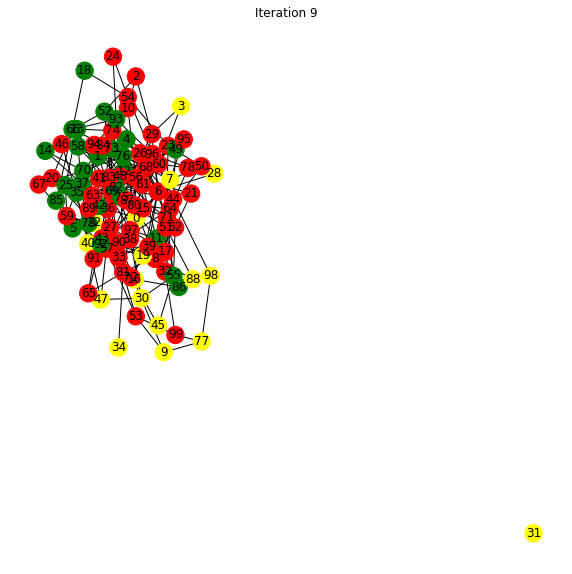

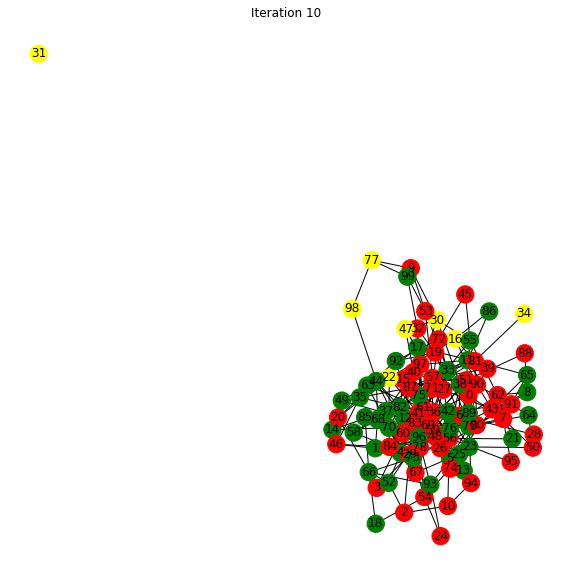

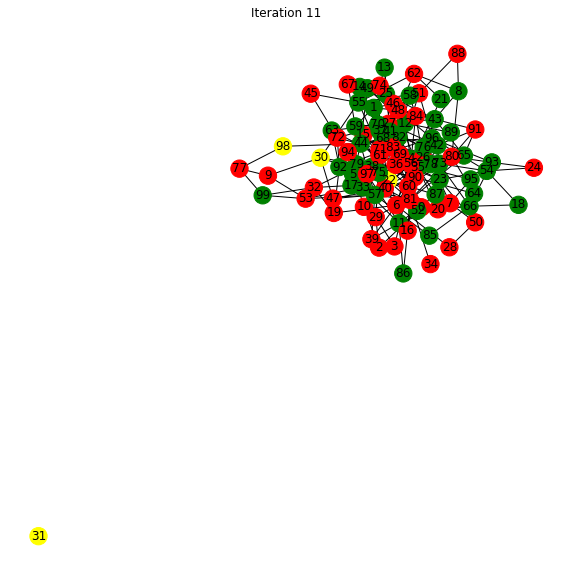

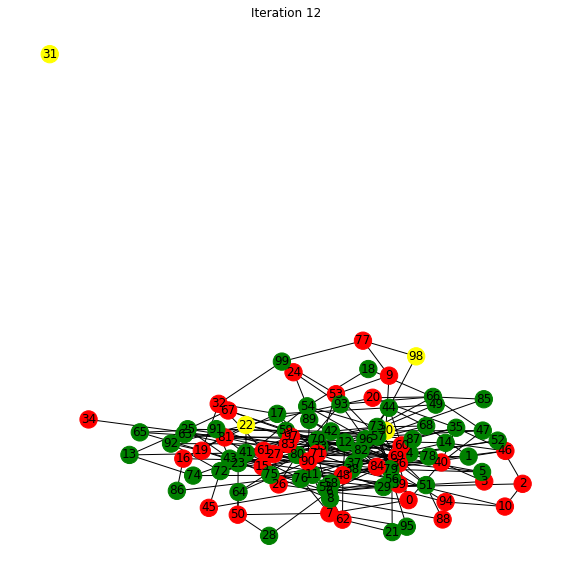

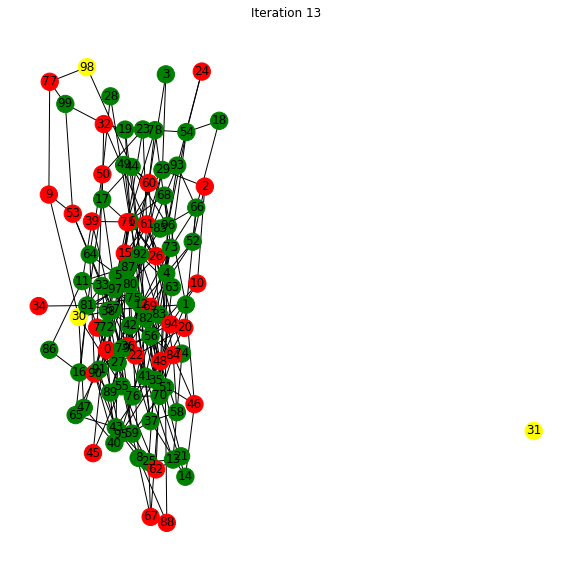

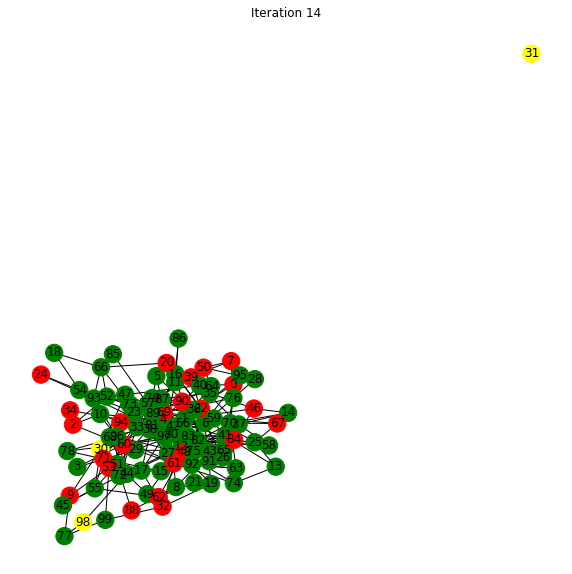

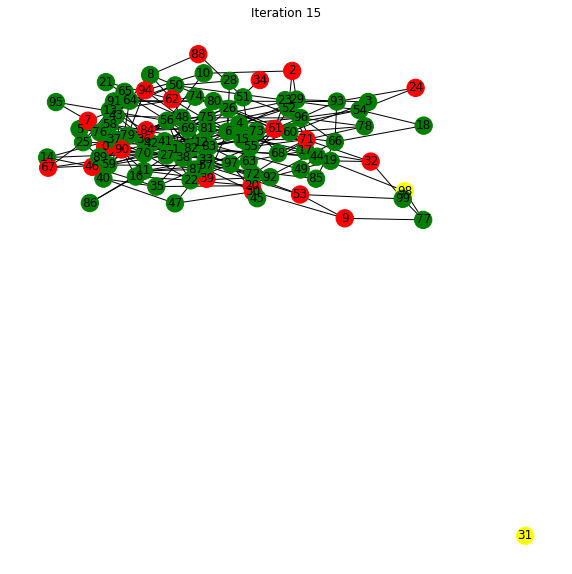

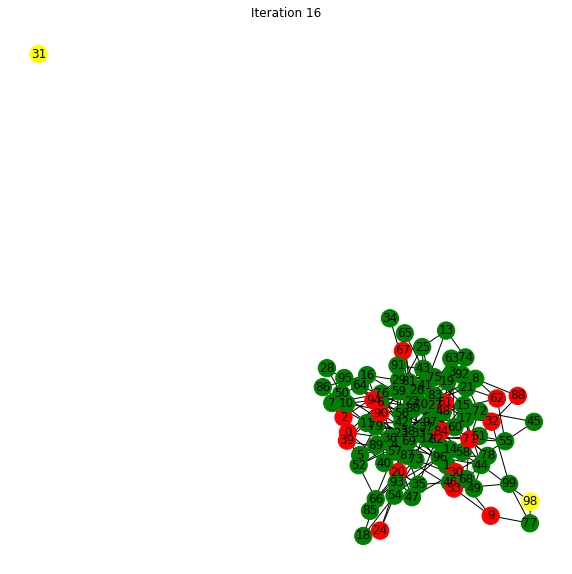

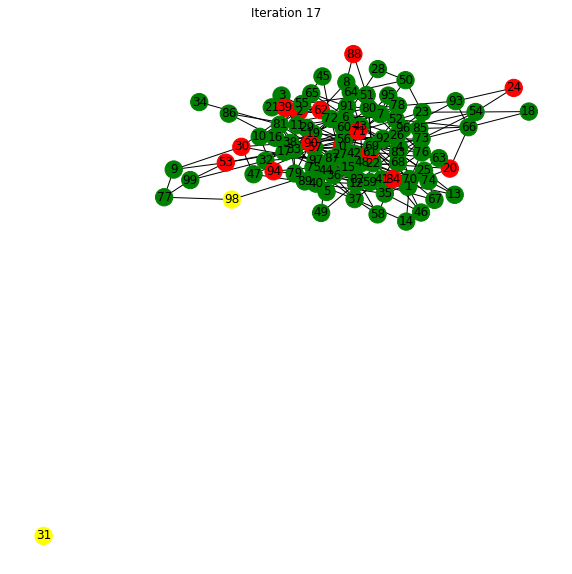

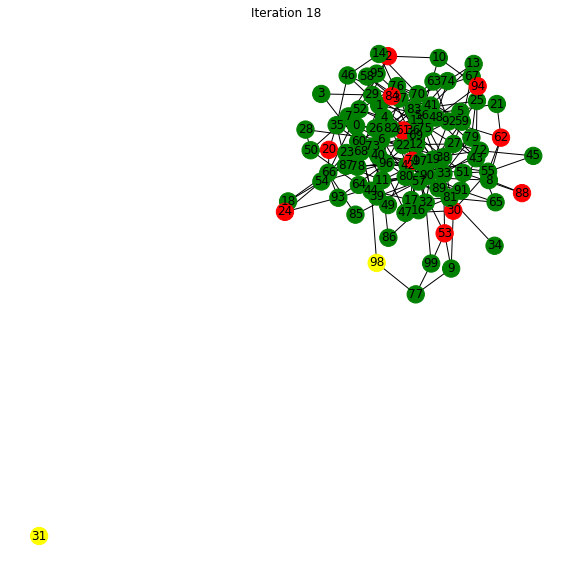

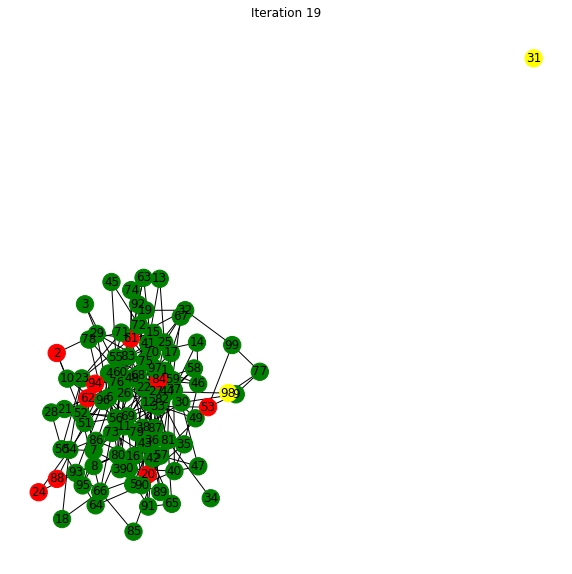

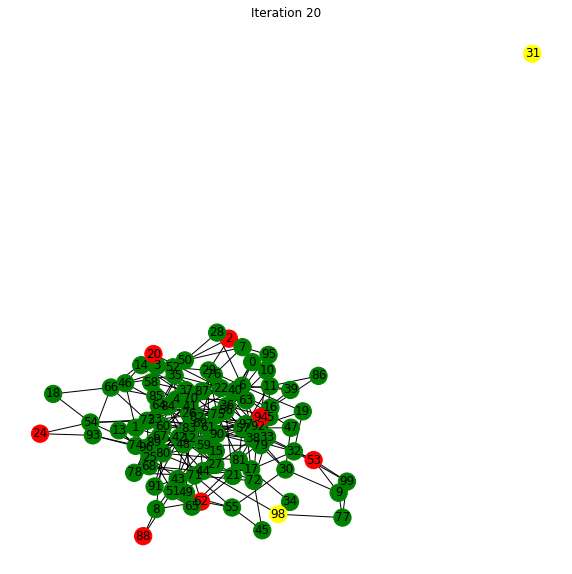

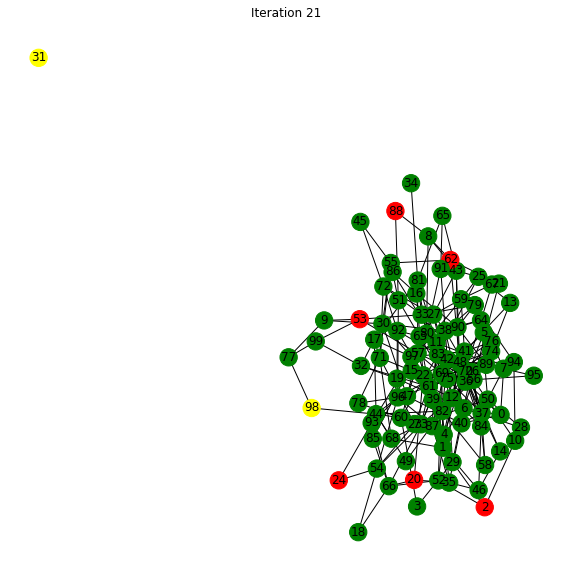

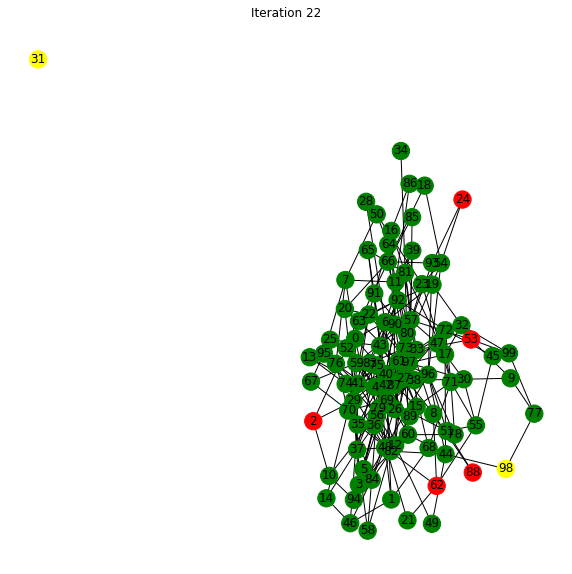

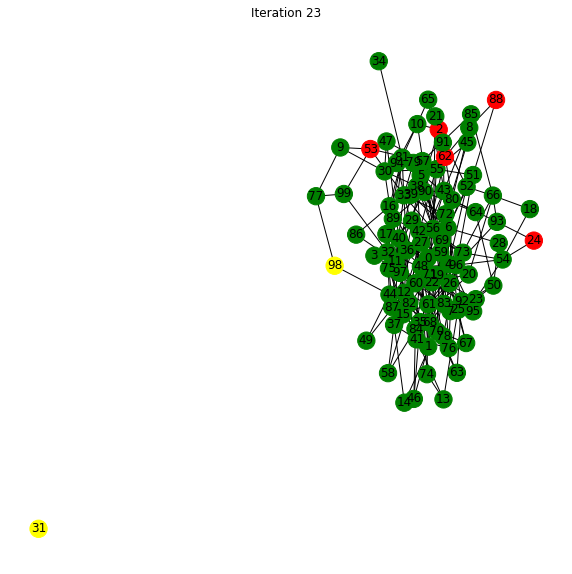

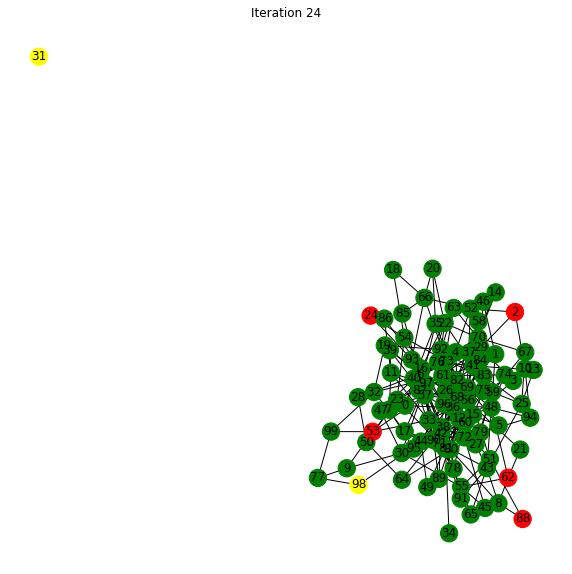

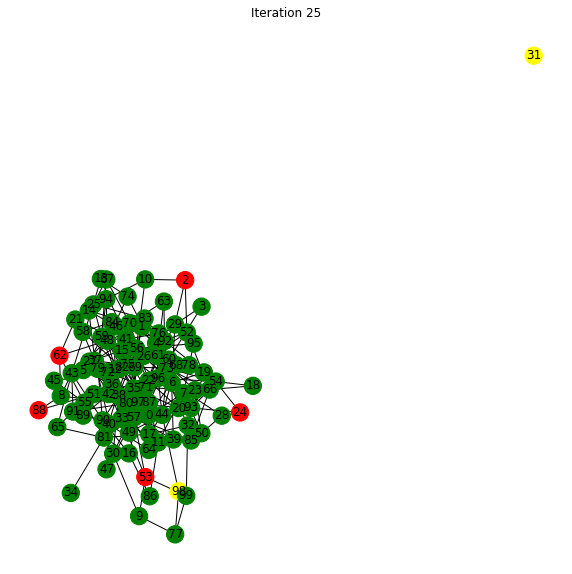

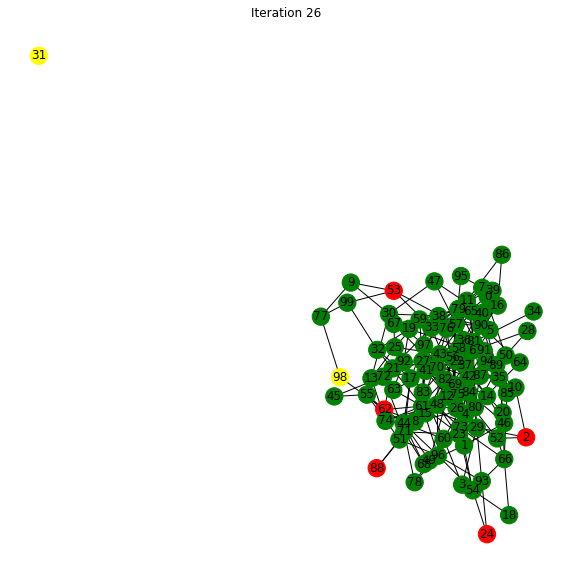

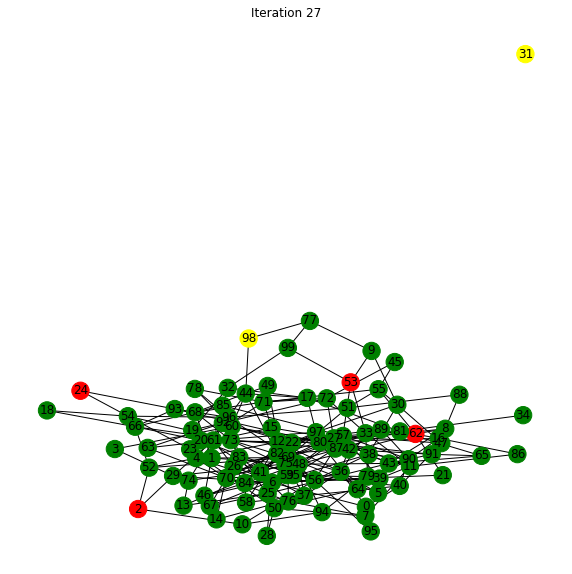

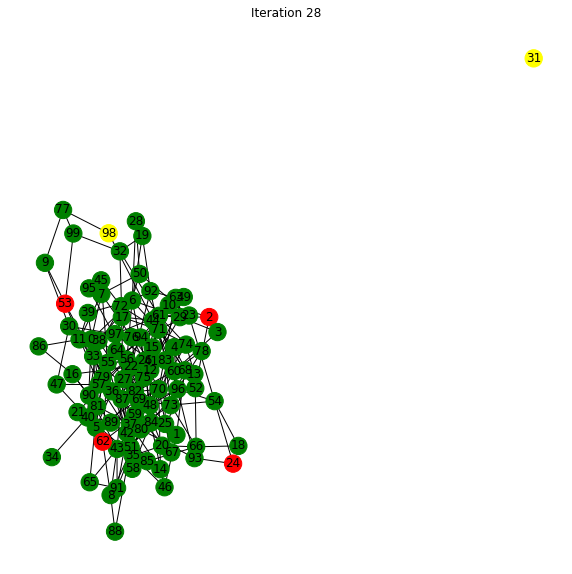

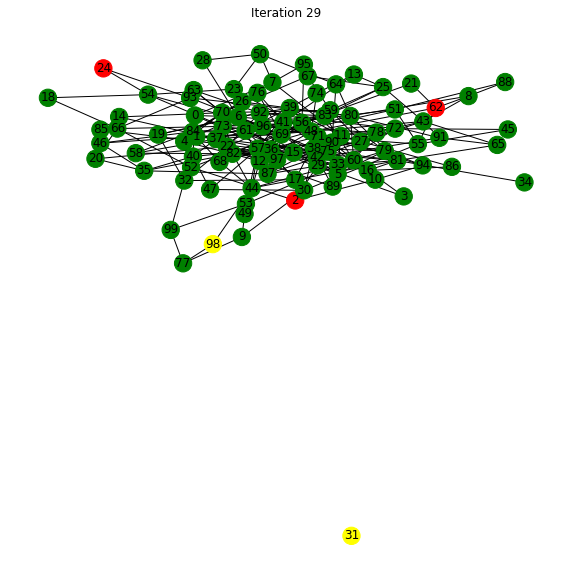

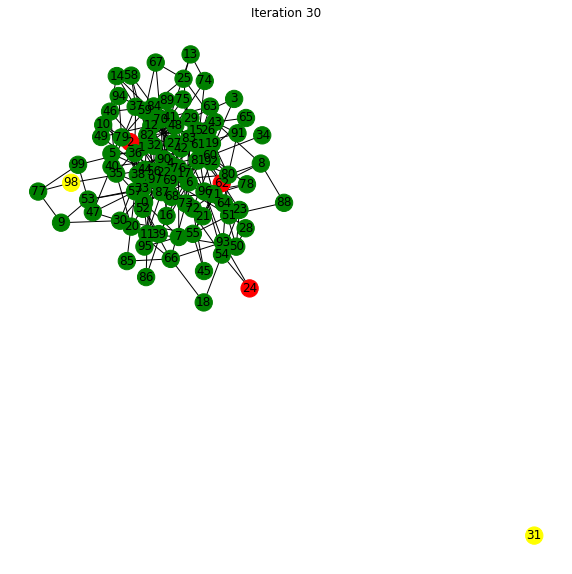

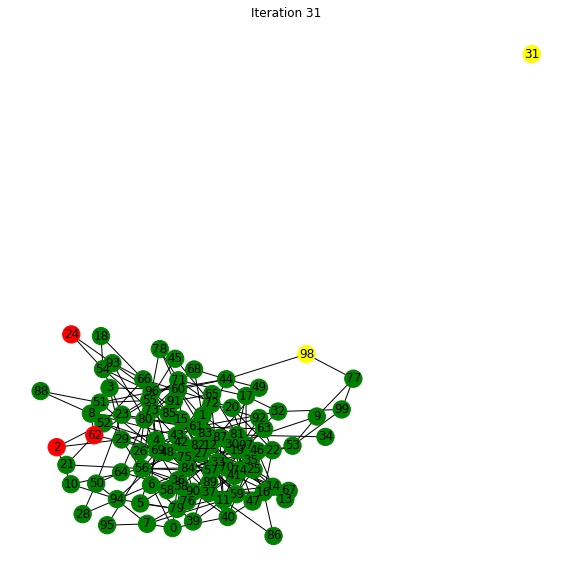

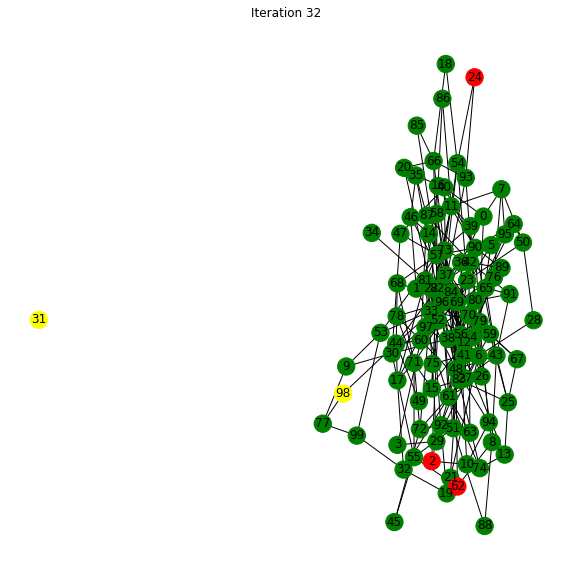

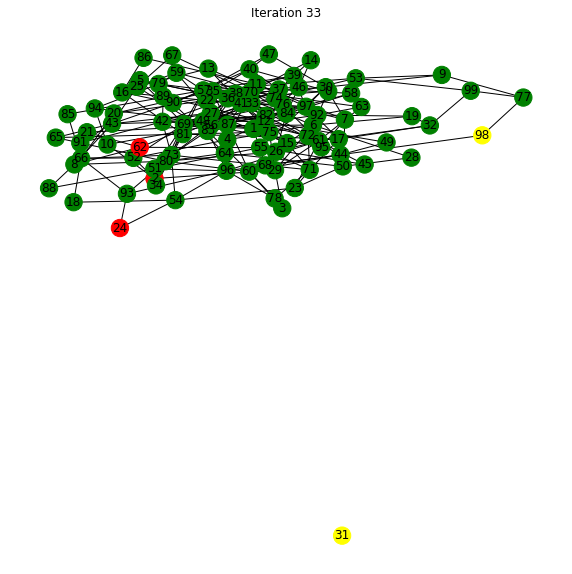

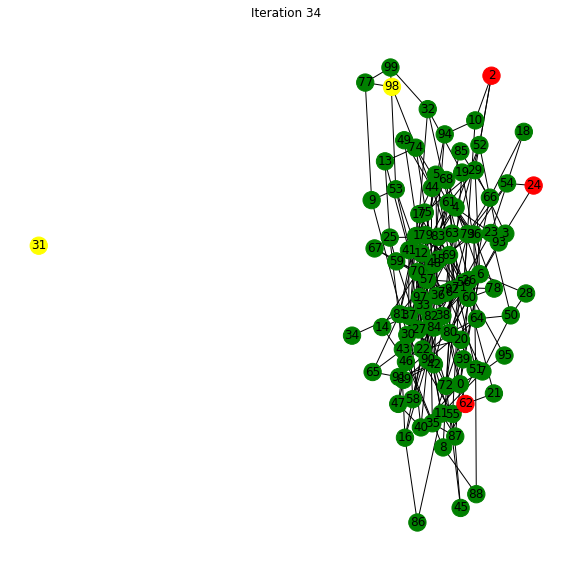

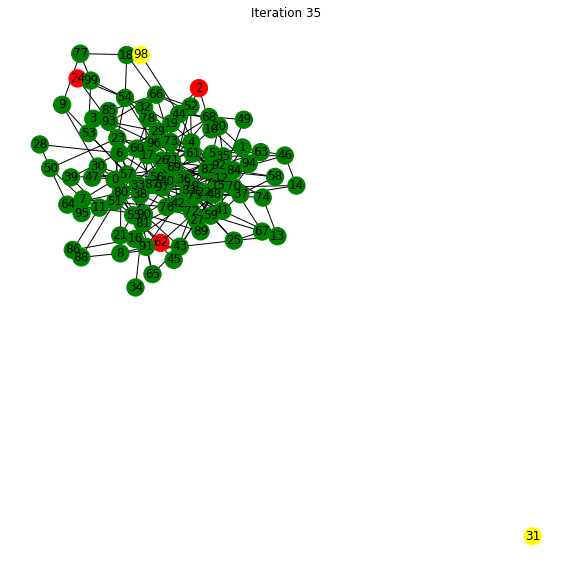

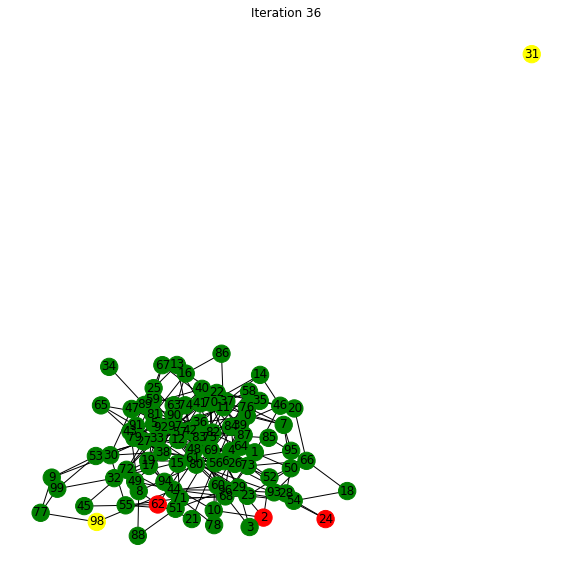

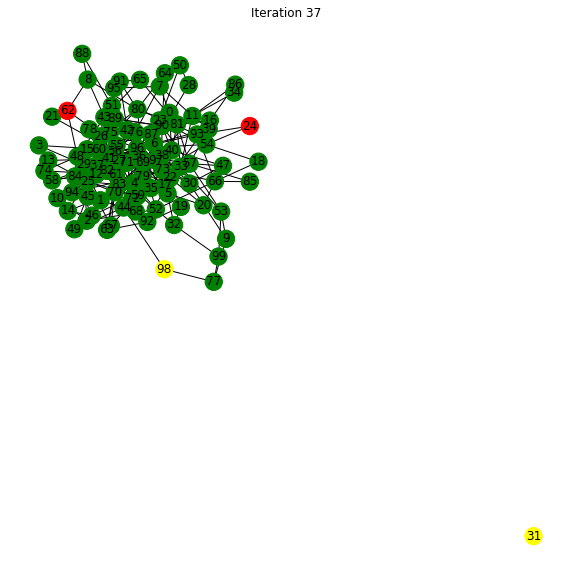

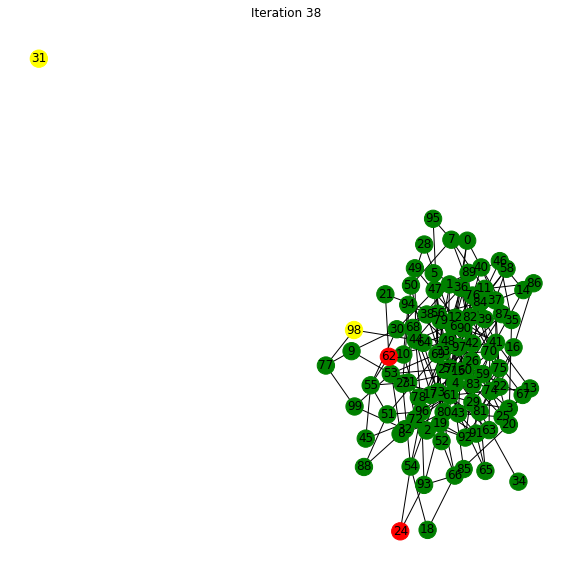

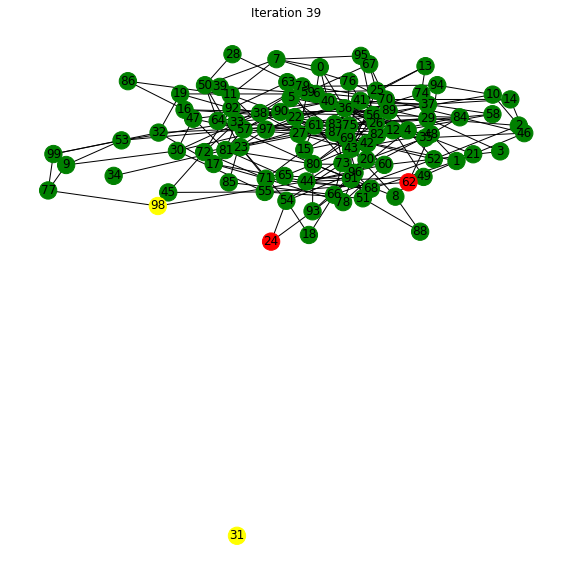

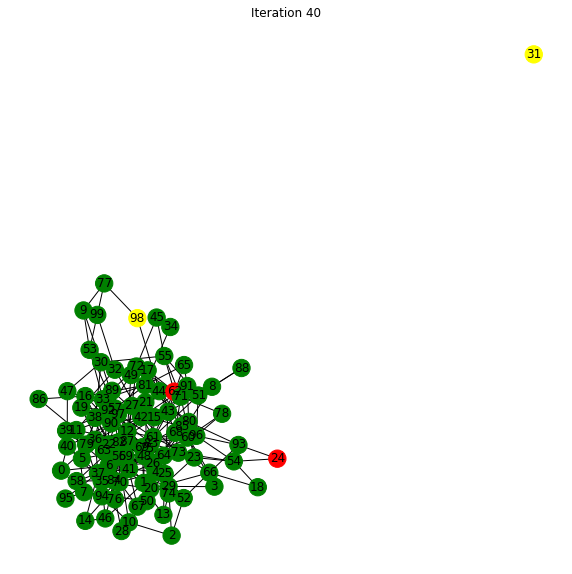

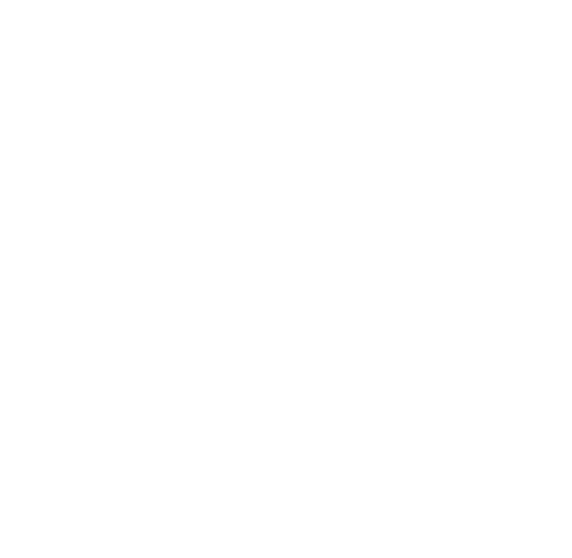

In [10]:
simulate_infection(100,0.05,0.3,0.2,40)